# Practice Problem (Big Mart Sales)

## 1. Problem Statement

<pre>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Regression Problem
• Sales as target variable (Item_Outlet_Sales)
• Properties of products and outlests as explanatory variables
</pre>

## 2. Hypothesis Generation 

<pre>
Possible Factors
• Item_Fat_Content - Higher fat content, higher sales
• Item_Visibility - higher visibility, higher sales
• Item_Type - Common type / essential items, higher sales
• Item_MRP - Lower price, higher sales
• Outlet_Size - Larger size, higher sales
• Outlet_Location_type - Bigger city with higher population, higher sales
• Outlet_Type - supermarket, higher sales
</pre>

In [1484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## 3. Loading and Understanding Dataset

In [1485]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

train['Source'] = 'train'
test['Source'] = 'test'

data = pd.concat([train,test],ignore_index=True)

In [1486]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [1487]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1488]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

In [1489]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

In [1490]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

## 4. Exploratory Data Analysis (EAD)

In [1491]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [1492]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

In [1493]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [1494]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [1495]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [1496]:
data['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [1497]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

## 4a. Univariate Analysis

In [1498]:
item_identifier_count = data['Item_Identifier'].value_counts()
item_identifier_count

FDB58    10
FDD45    10
FDT56    10
FDW10    10
FDR21    10
         ..
DRN11     7
FDO33     7
FDM52     7
FDH58     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [1499]:
item_identifier_count.value_counts()

9     737
10    504
8     305
7      13
Name: Item_Identifier, dtype: int64

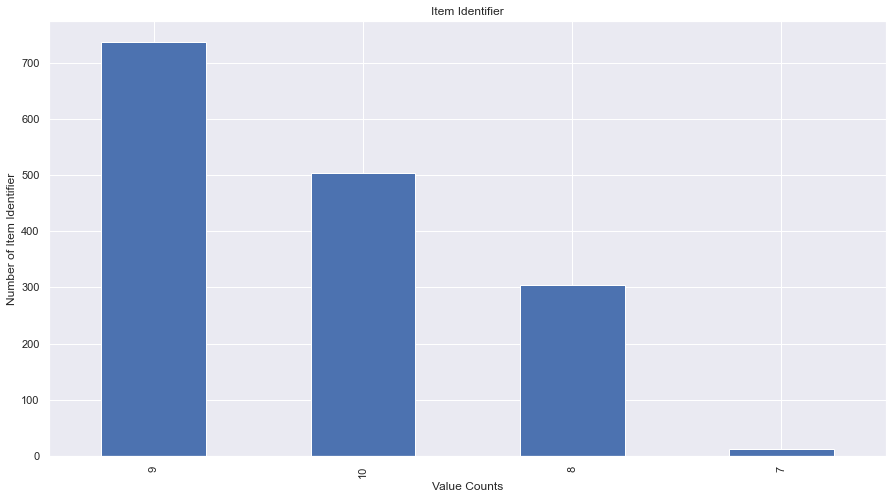

In [1500]:
fig, ax = plt.subplots(figsize=(15,8))
item_identifier_count.value_counts().plot.bar()
ax.set(title='Item Identifier',xlabel='Value Counts',ylabel='Number of Item Identifier')
plt.show()

In [1501]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [1502]:
data.loc[data['Item_Fat_Content']=='low fat','Item_Fat_Content'] = 'Low Fat'
data.loc[data['Item_Fat_Content']=='LF','Item_Fat_Content'] = 'Low Fat'
data.loc[data['Item_Fat_Content']=='reg','Item_Fat_Content'] = 'Regular'

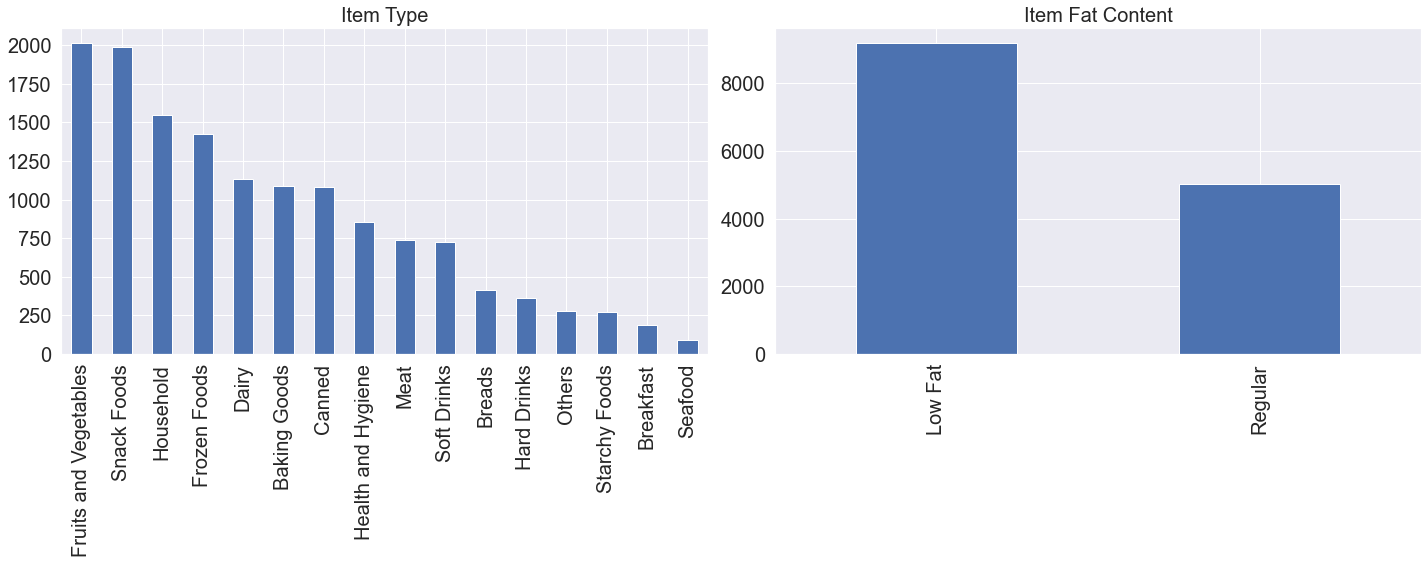

In [1503]:
fig = plt.figure()

plt.subplot(121)
data['Item_Type'].value_counts().plot.bar(figsize=(20,8),fontsize=20)
plt.title('Item Type',fontsize=20)

plt.subplot(122)
data['Item_Fat_Content'].value_counts().plot.bar(fontsize=20)
plt.title('Item Fat Content',fontsize=20)

plt.tight_layout()

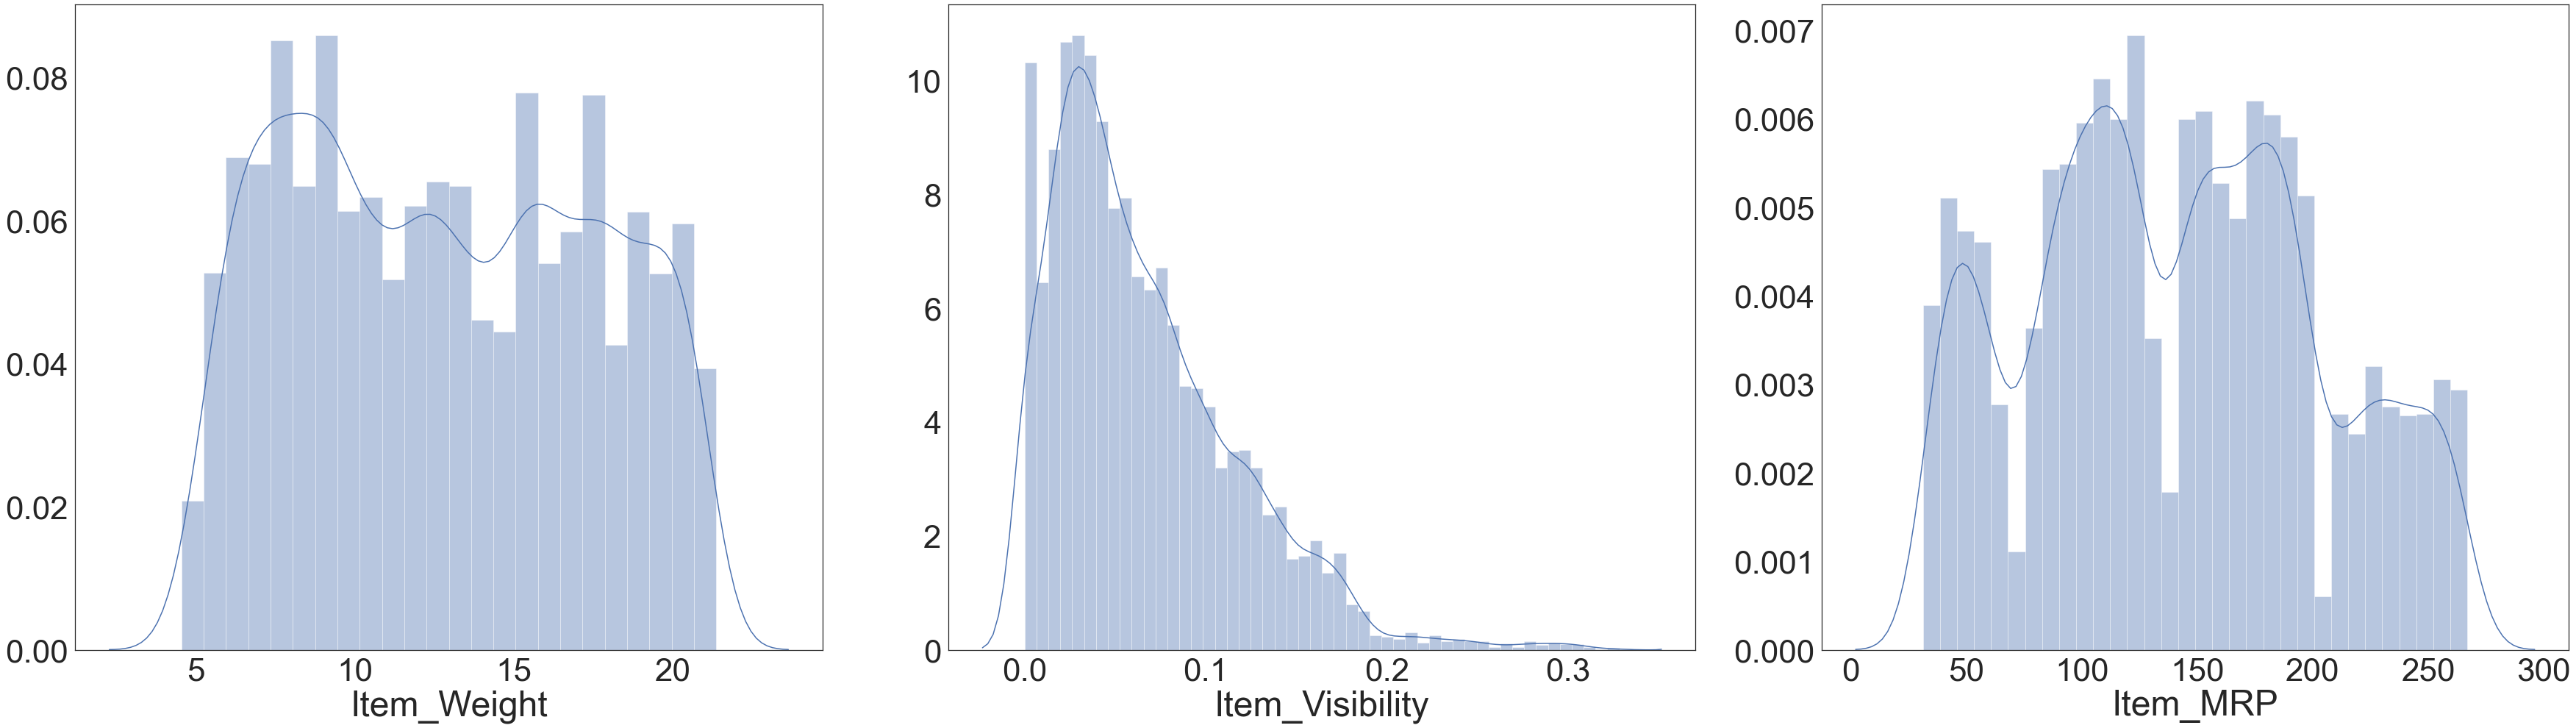

In [1504]:
fig = plt.figure(figsize=(50,15))
sns.set(font_scale=4, style='white')

plt.subplot(131)
sns.distplot(data['Item_Weight'])

plt.subplot(132)
sns.distplot(data['Item_Visibility'])

plt.subplot(133)
sns.distplot(data['Item_MRP'])

plt.tight_layout()

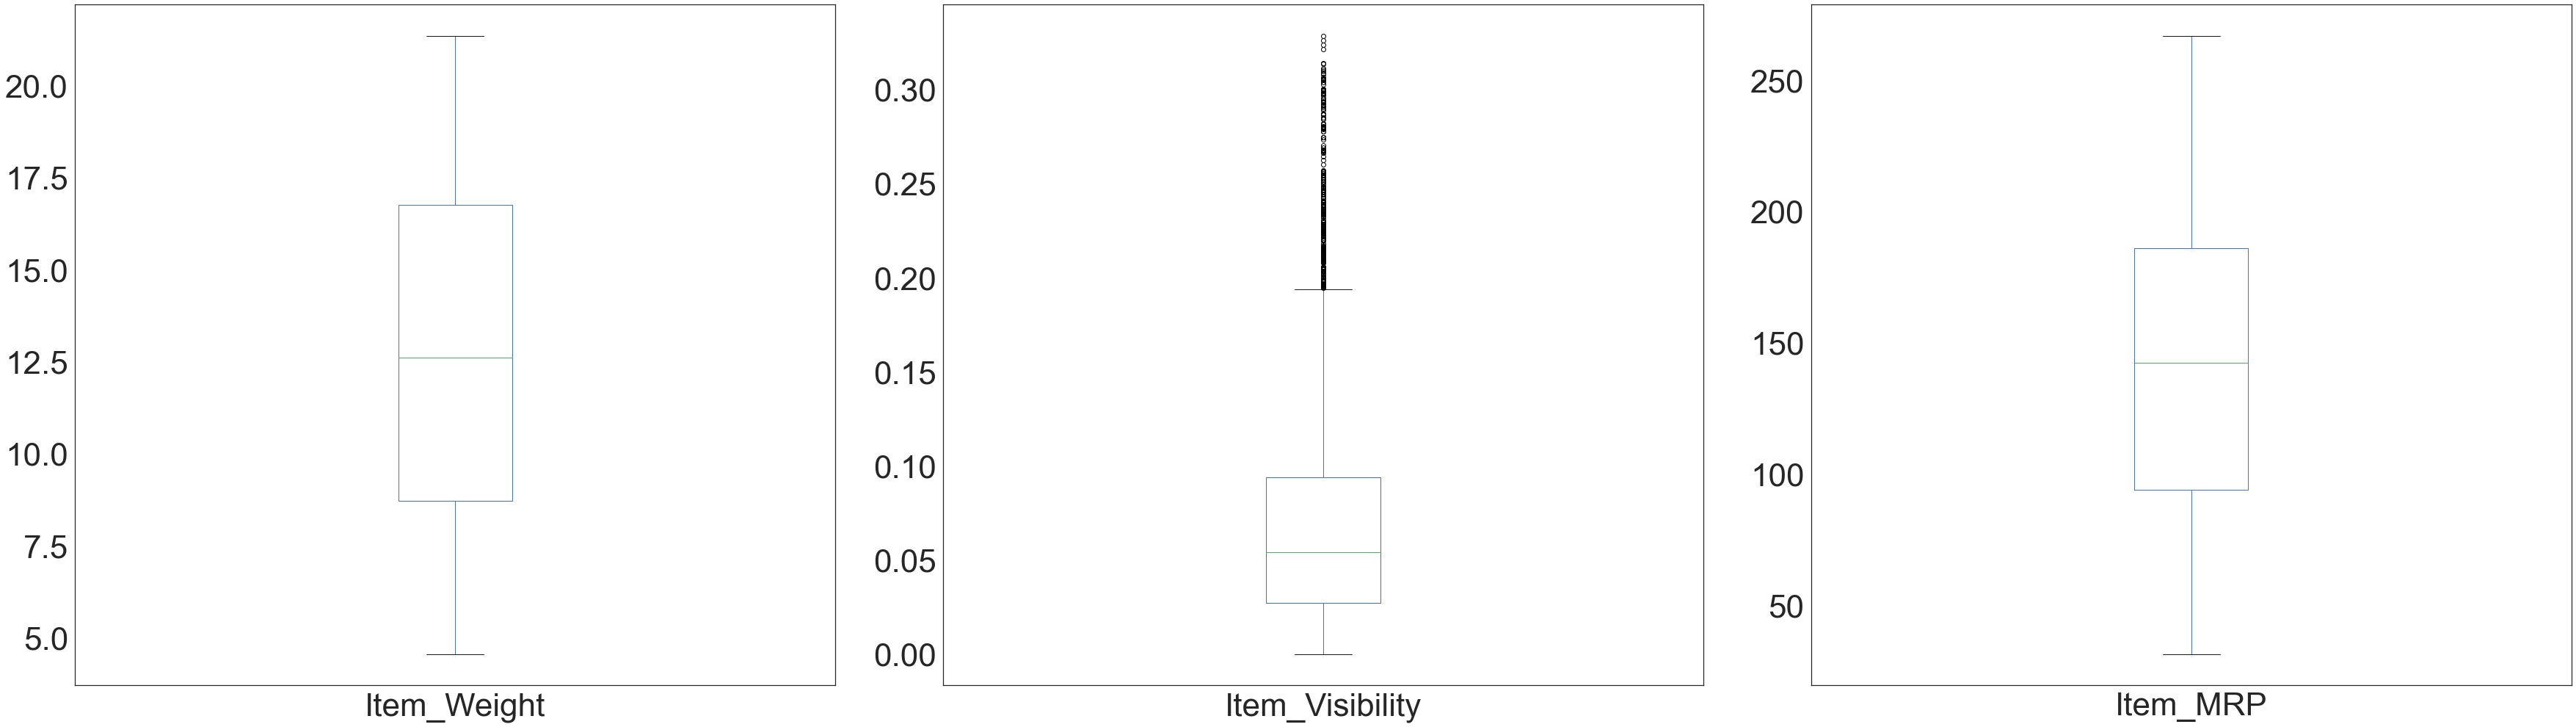

In [1505]:
fig = plt.figure(figsize=(50,15))

plt.subplot(131)
data['Item_Weight'].plot.box()

plt.subplot(132)
data['Item_Visibility'].plot.box()

plt.subplot(133)
data['Item_MRP'].plot.box()

plt.tight_layout()

In [1506]:
data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

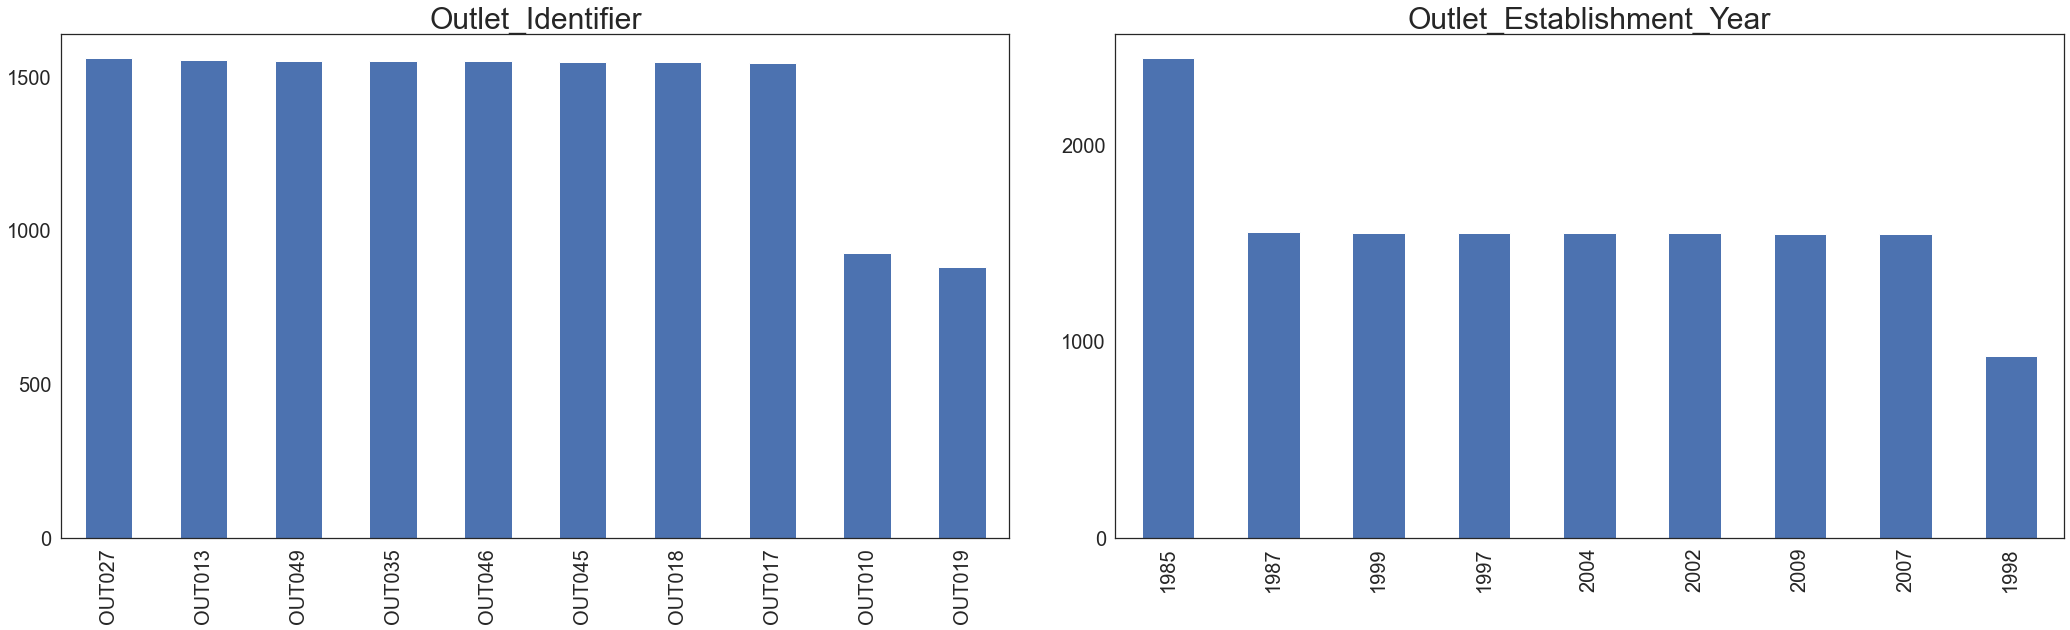

In [1507]:
fig = plt.figure()

plt.subplot(121)
data['Outlet_Identifier'].value_counts().plot(kind='bar',fontsize=20, figsize=(30,10))
plt.title('Outlet_Identifier',fontsize=30)

plt.subplot(122)
data['Outlet_Establishment_Year'].value_counts().plot.bar(fontsize=20)
plt.title('Outlet_Establishment_Year',fontsize=30)

plt.tight_layout()

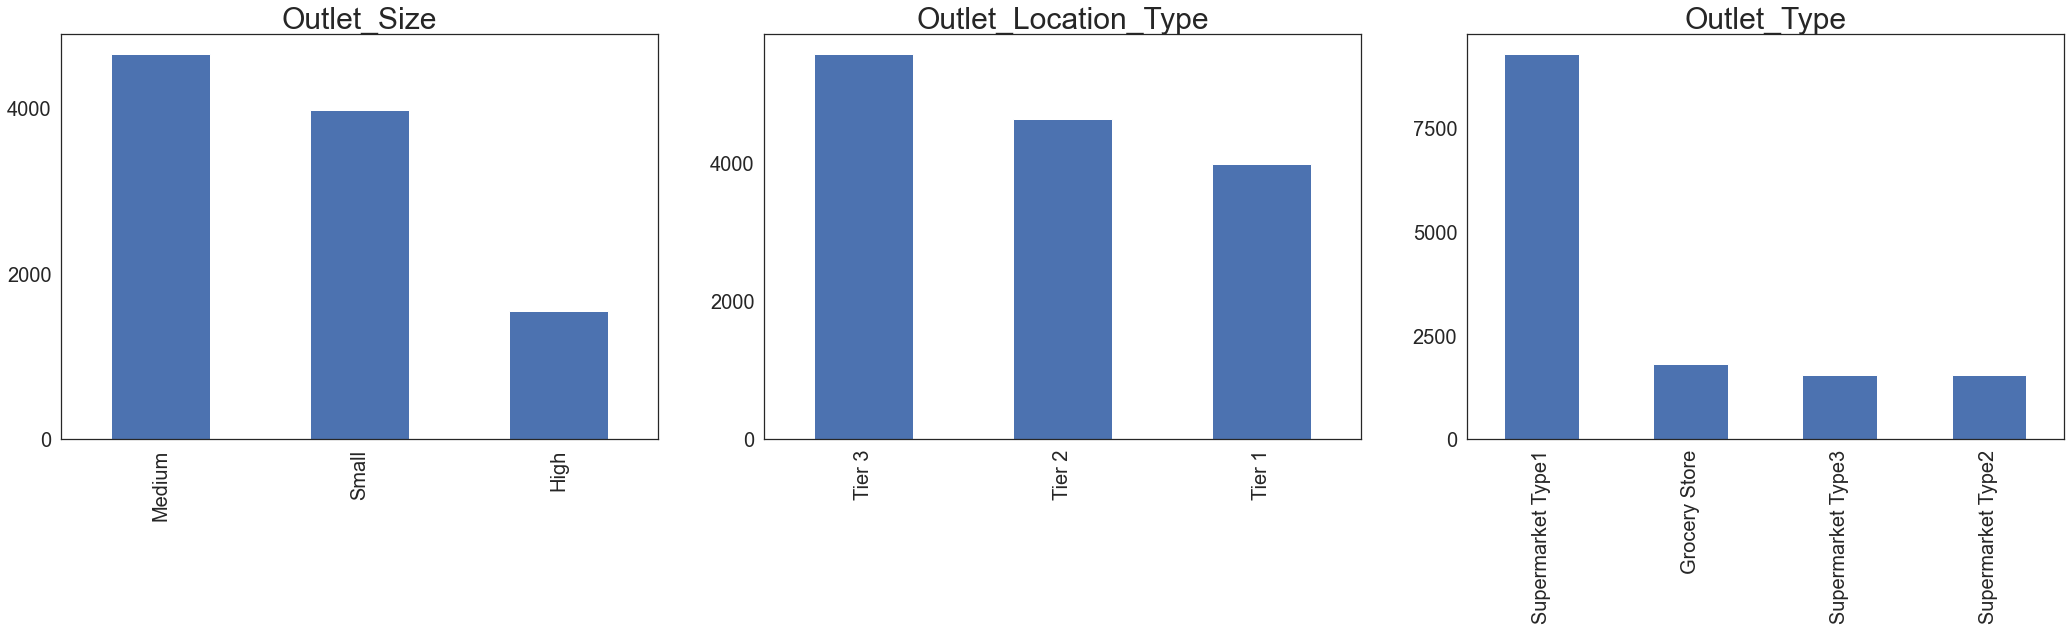

In [1508]:
fig = plt.figure()

plt.subplot(131)
data['Outlet_Size'].value_counts().plot(kind='bar',fontsize=20, figsize=(30,10))
plt.title('Outlet_Size',fontsize=30)

plt.subplot(132)
data['Outlet_Location_Type'].value_counts().plot.bar(fontsize=20)
plt.title('Outlet_Location_Type',fontsize=30)

plt.subplot(133)
data['Outlet_Type'].value_counts().plot.bar(fontsize=20)
plt.title('Outlet_Type',fontsize=30)

plt.tight_layout()

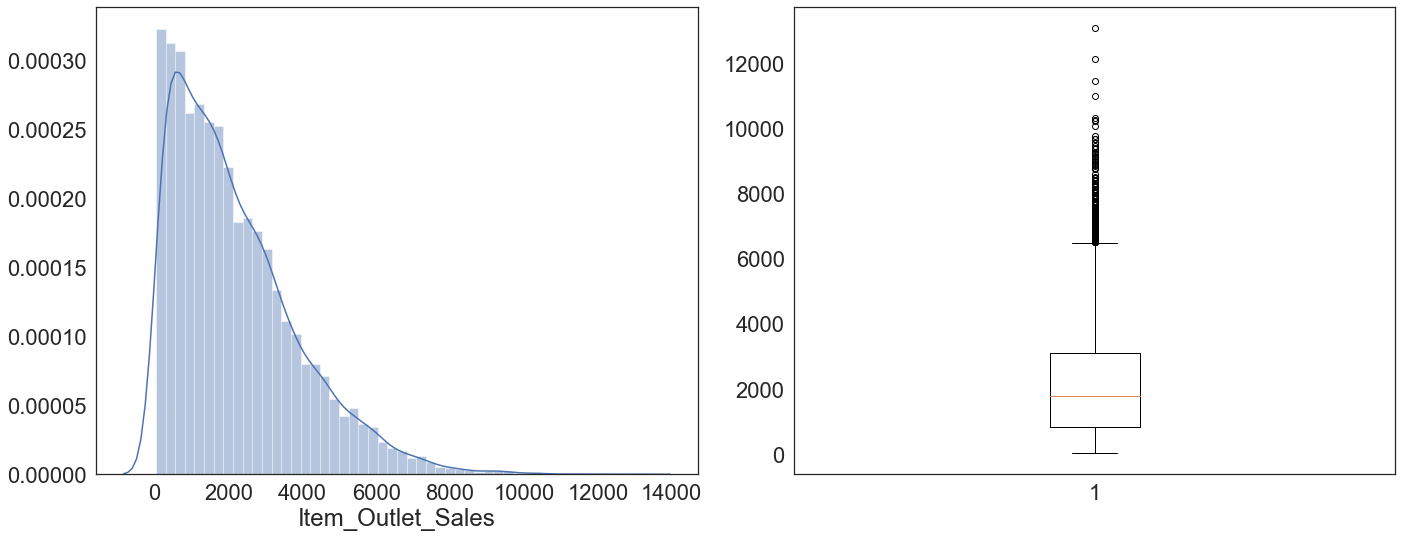

In [1509]:
fig = plt.figure(figsize=(20,8))
sns.set(font_scale=2,style='white')

plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
plt.boxplot(train['Item_Outlet_Sales'])

plt.tight_layout()

## 4b. Bivariate Analysis

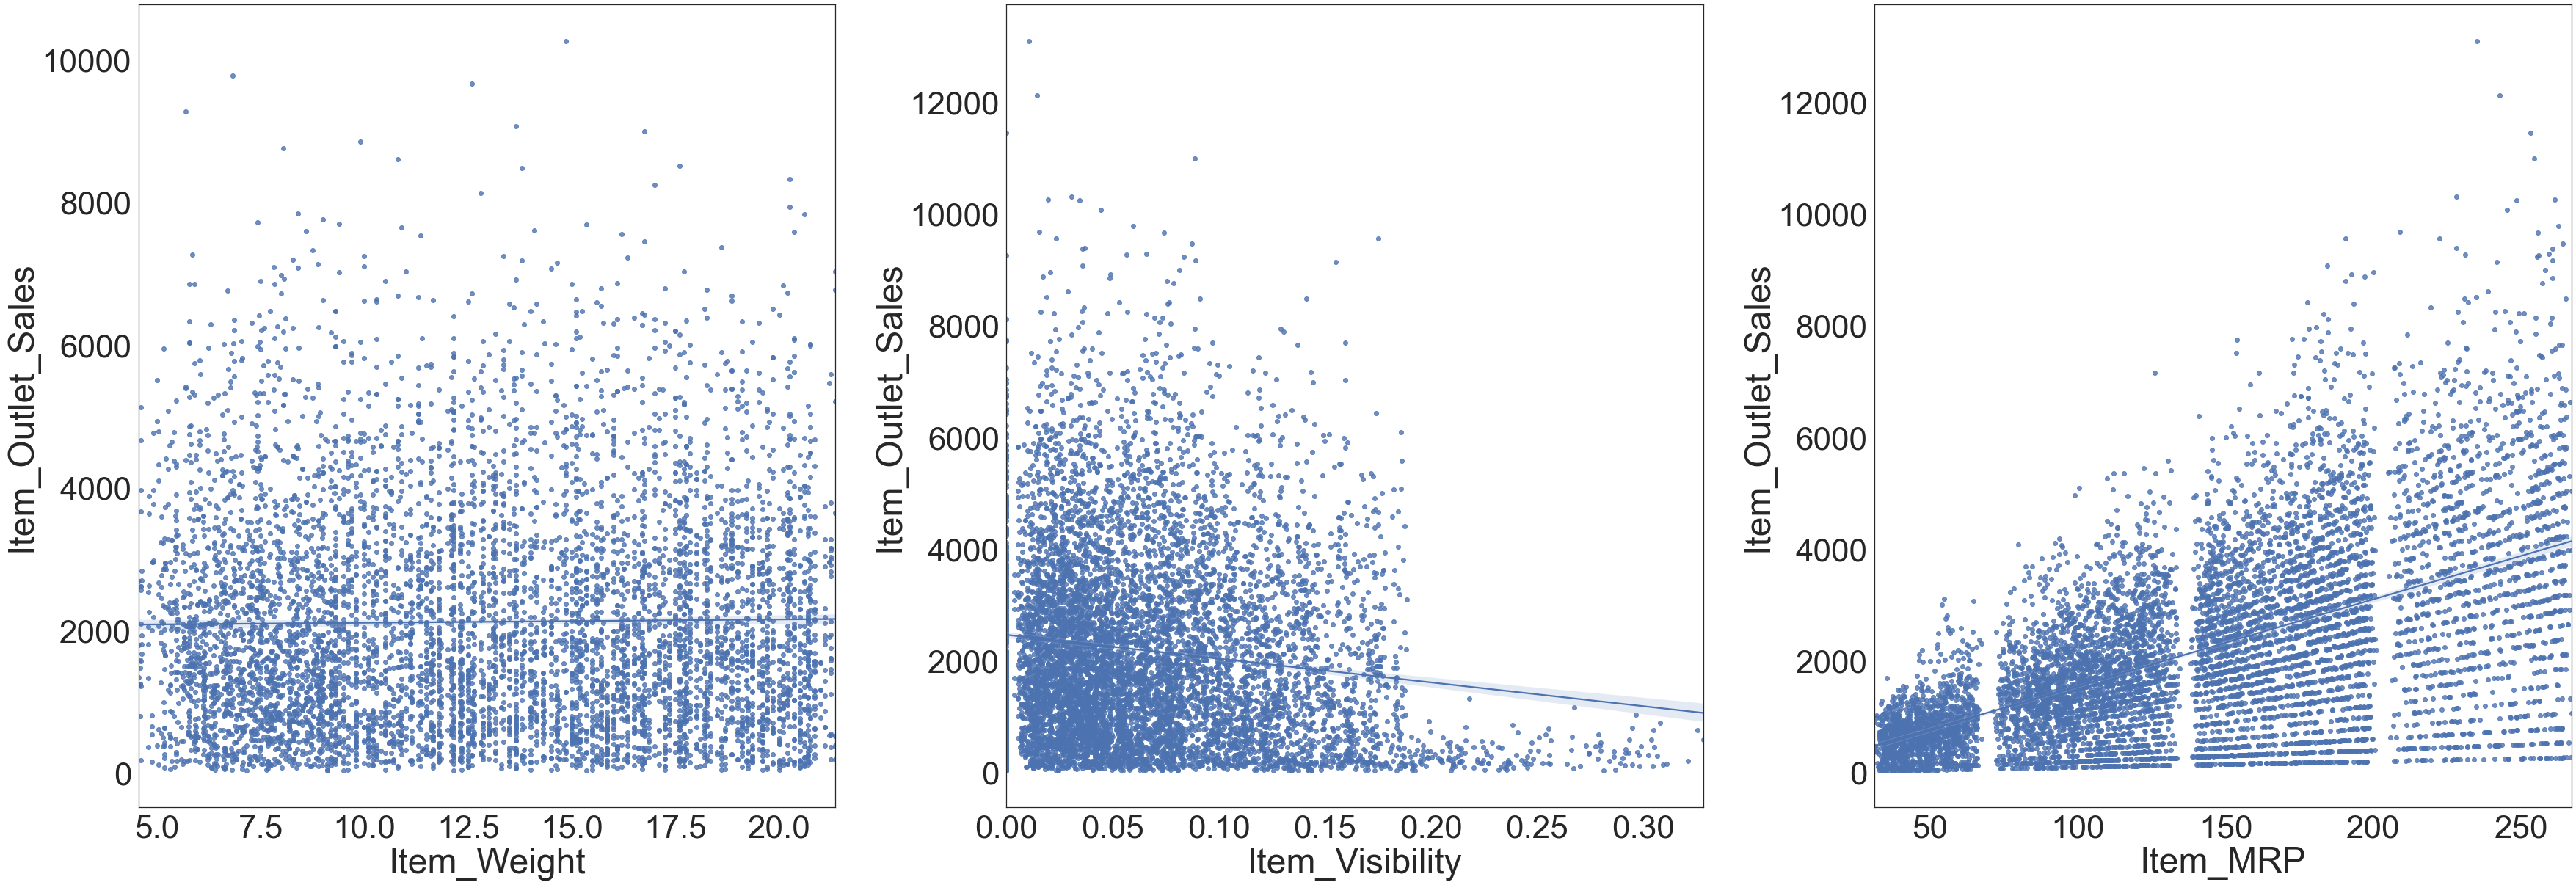

In [1510]:
fig = plt.figure(figsize=(50,18))
sns.set(font_scale=4, style='white')

plt.subplot(131)
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)

plt.subplot(132)
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

plt.subplot(133)
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

plt.tight_layout()

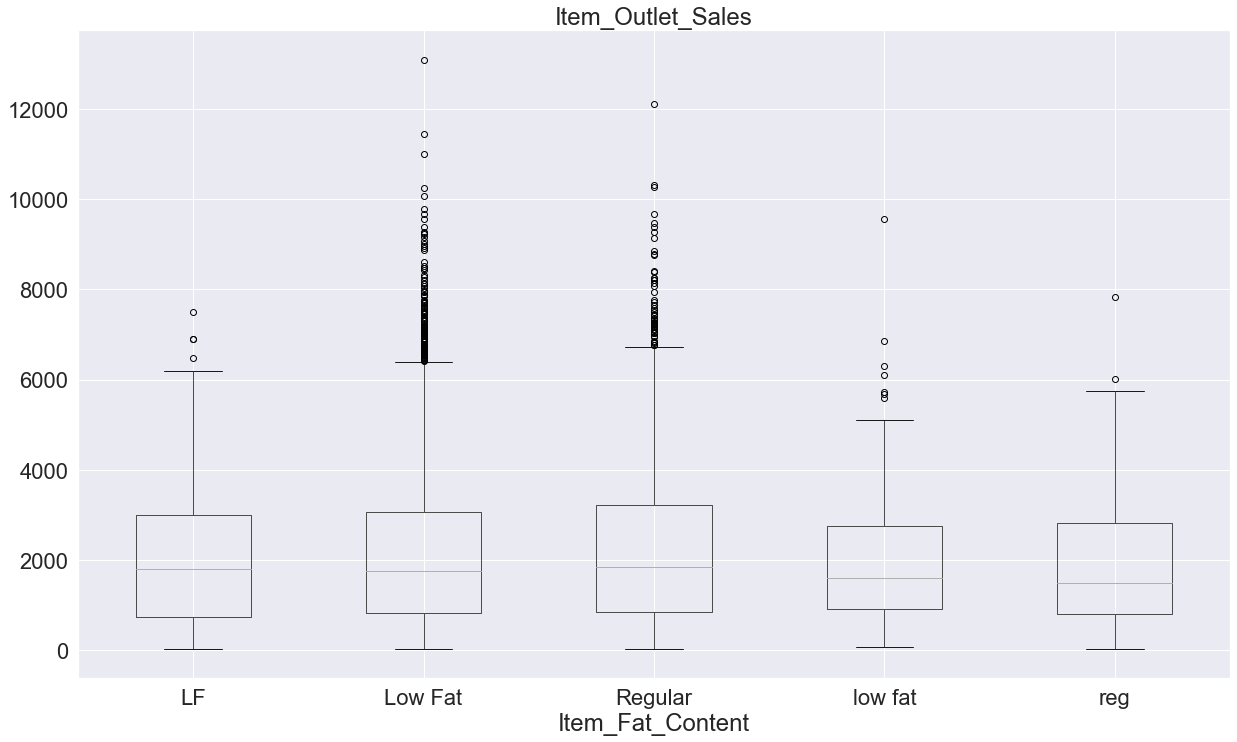

In [1511]:
sns.set(font_scale=2)
train.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content',figsize=(20,12),)

plt.suptitle('')
plt.show()

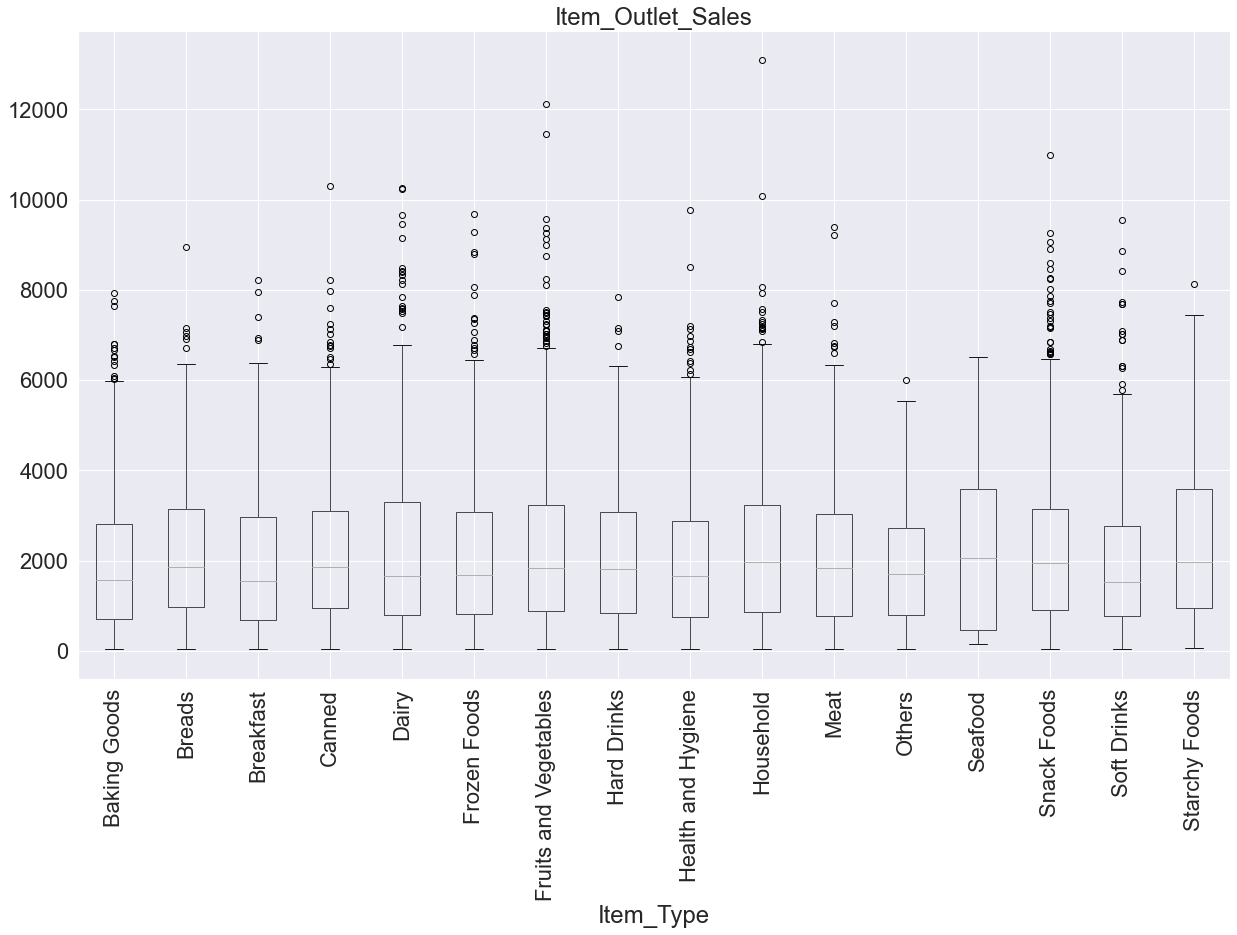

In [1512]:
train.boxplot(column='Item_Outlet_Sales',by='Item_Type',figsize=(20,12))
plt.xticks(rotation=90)

plt.suptitle('')
plt.show()

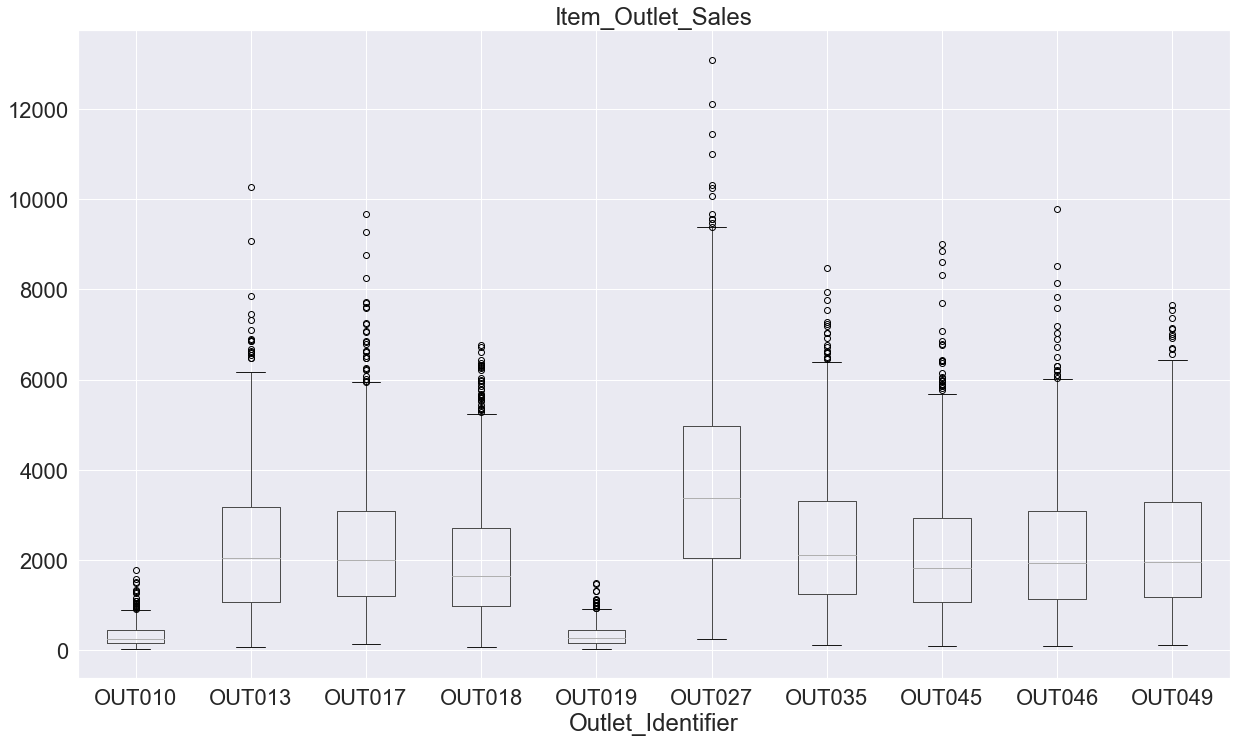

In [1513]:
train.boxplot(column='Item_Outlet_Sales',by='Outlet_Identifier',figsize=(20,12))

plt.suptitle('')
plt.show()

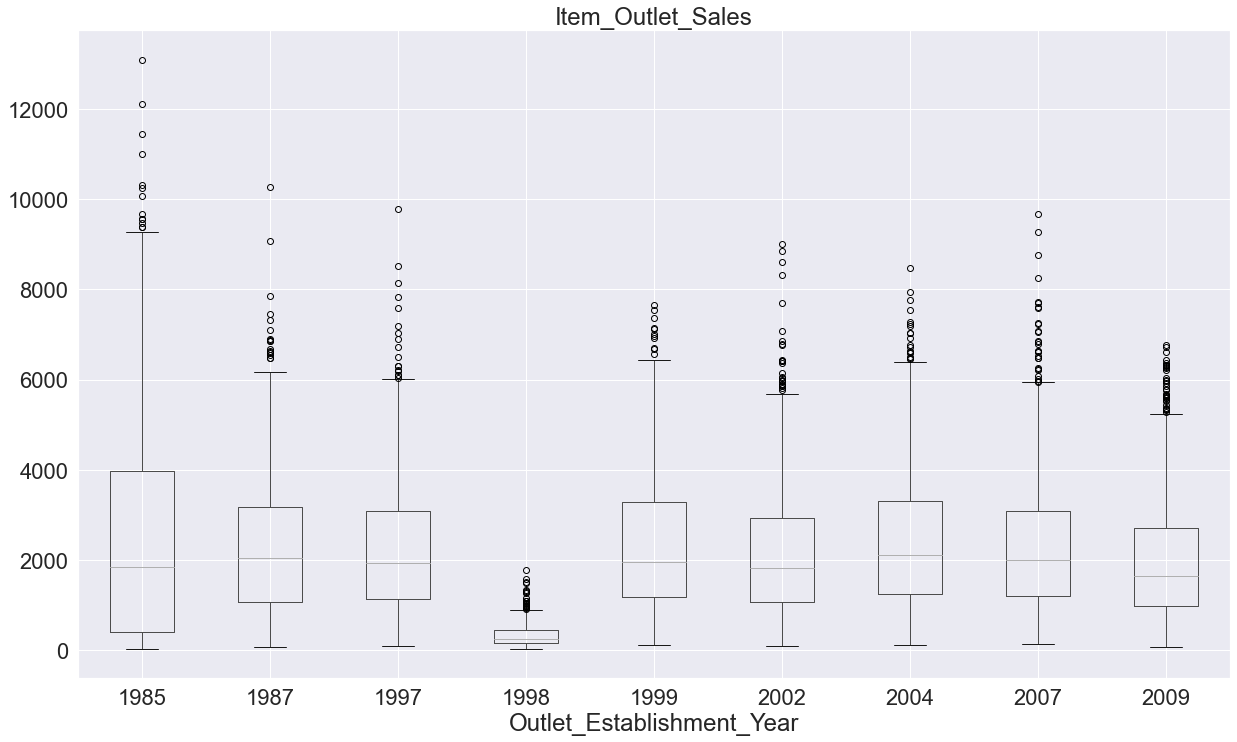

In [1514]:
train.boxplot(column='Item_Outlet_Sales',by='Outlet_Establishment_Year',figsize=(20,12))

plt.suptitle('')
plt.show()

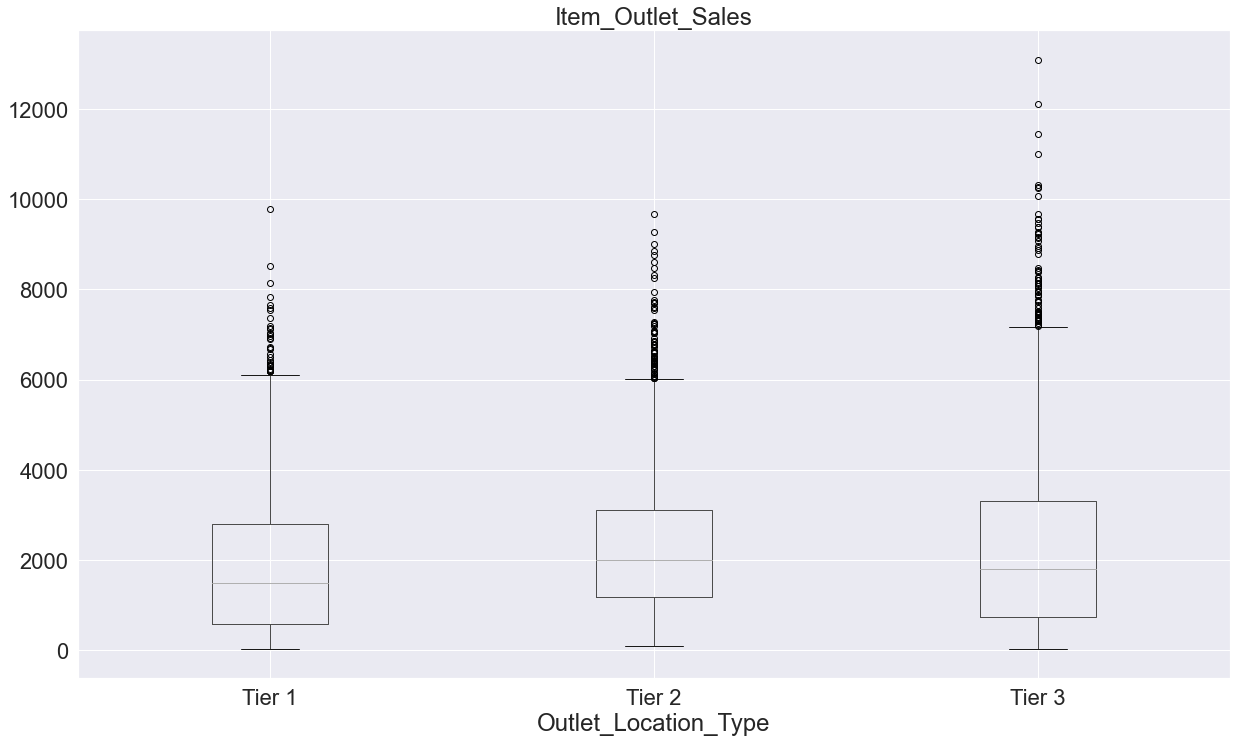

In [1515]:
train.boxplot(column='Item_Outlet_Sales',by='Outlet_Location_Type',figsize=(20,12))

plt.suptitle('')
plt.show()

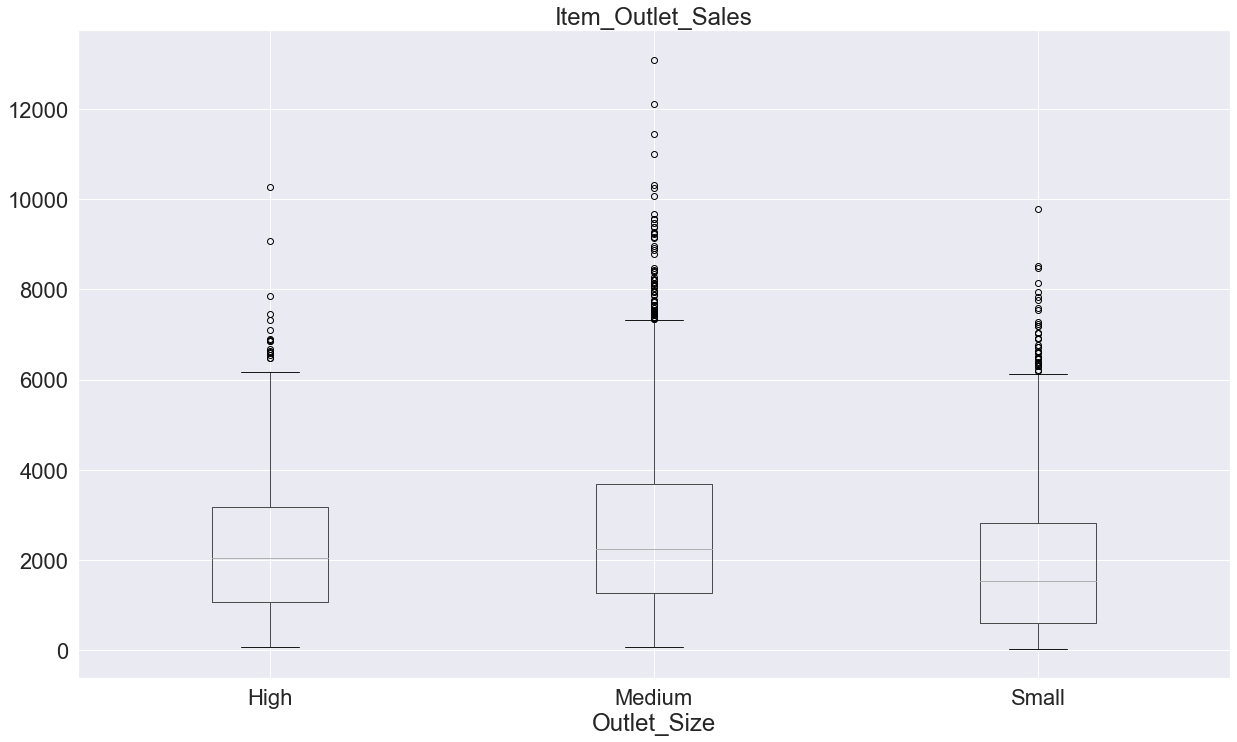

In [1516]:
train.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(20,12))

plt.suptitle('')
plt.show()

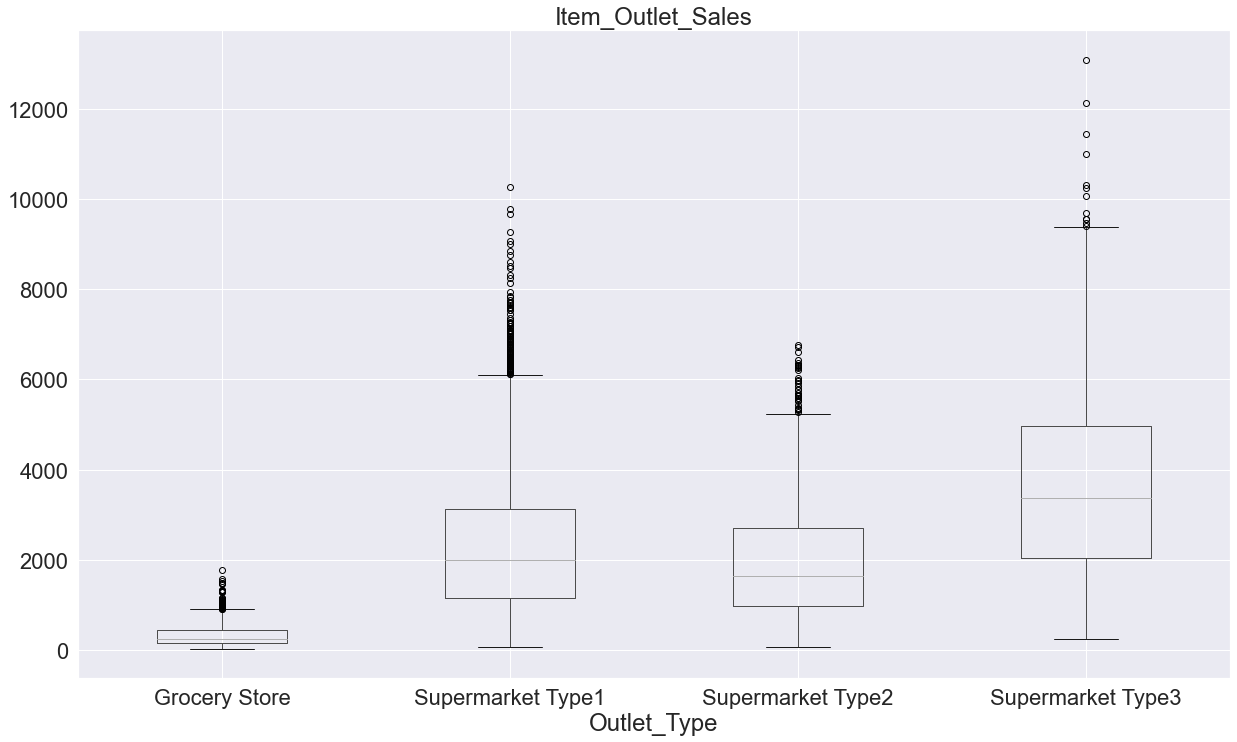

In [1517]:
train.boxplot(column='Item_Outlet_Sales',by='Outlet_Type',figsize=(20,12))

plt.suptitle('')
plt.show()

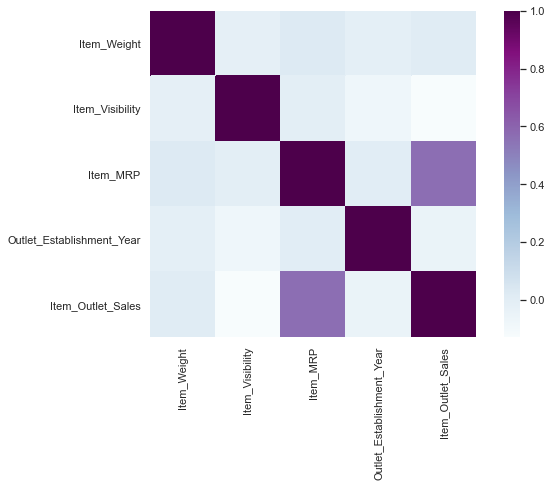

In [1518]:
fig = plt.figure(figsize=(10,6))
matrix = train.corr()
sns.set(font_scale=1)
sns.heatmap(matrix,square=True,cmap='BuPu')
plt.show()

## 5. Missing Value and Outlier Treatment

In [1519]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [1520]:
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [1521]:
data['Outlet_Size'] = data.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [1522]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

## 6. Feature Engineering

In [1523]:
data.loc[data['Item_Visibility'] == 0, 'Item_Visibility'] = data['Item_Visibility'].mean()

In [1524]:
data[data['Item_Visibility'] == 0]['Item_Visibility'].count()

0

In [1525]:
avg_visibility = data.pivot_table(values='Item_Visibility',index='Item_Identifier', aggfunc=np.mean)
avg_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.049594
DRA24,0.045646
DRA59,0.139979
DRB01,0.087980
DRB13,0.014127
...,...
NCZ30,0.033897
NCZ41,0.064640
NCZ42,0.017610


In [1526]:
data['Item_Visibility_MeanRatio'] = \
data.apply(lambda x: x['Item_Visibility']/avg_visibility.loc[x['Item_Identifier']], axis=1)

In [1527]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.000000
std          0.318470
min          0.284081
25%          0.876089
50%          0.926047
75%          0.999070
max          5.328814
Name: Item_Visibility_MeanRatio, dtype: float64

In [1528]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [1529]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [1530]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [1531]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [1532]:
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [1533]:
from sklearn.preprocessing import LabelEncoder

In [1534]:
le = LabelEncoder()
var_mod = ['Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size',
           'Item_Type_Combined','Outlet_Type']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [1535]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source',
       'Item_Visibility_MeanRatio', 'Item_Type_Combined', 'Outlet_Years'],
      dtype='object')

## 7. Split Dataset to Train and Test

In [1540]:
data.drop(['Item_Identifier','Item_Visibility','Item_Type','Outlet_Establishment_Year','Outlet_Identifier'],axis=1,inplace=True)

train = data.loc[data['Source']=='train']
test = data.loc[data['Source']=='test']

train.drop('Source',axis=1,inplace=True)
test.drop(['Source','Item_Outlet_Sales'],axis=1,inplace=True)

In [ ]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

## 8. Building Model 

In [1541]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate

In [1542]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

In [1543]:
X = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [1553]:
X.shape,y.shape

((8523, 9), (8523,))

In [1544]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

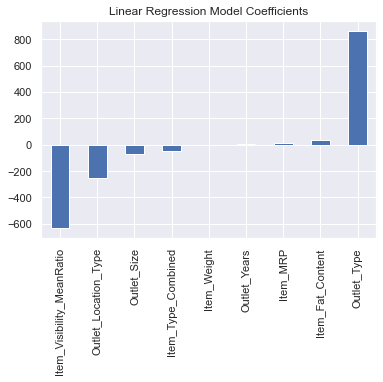

In [1545]:
coef = pd.Series(model.coef_,index=x_train.columns).sort_values()
coef.plot.bar(title='Linear Regression Model Coefficients')
plt.show()

In [1549]:
cv_score = cross_validate(model,x_cv,y_cv,cv=5,scoring=['r2','neg_mean_squared_error'])

In [1579]:
print("Mean Squared Error: ",np.sqrt(np.abs(cv_score['test_neg_mean_squared_error'])))
print("\nR2 Score: ",cv_score['test_r2'])

Mean Squared Error:  [1248.34070017 1220.70153276 1160.91434014 1187.78613176 1182.20544417]

R2 Score:  [0.49765962 0.46929271 0.53561737 0.4763393  0.48796871]


In [1548]:
cv_score

{'fit_time': array([0.0053401 , 0.00397396, 0.00296497, 0.00381708, 0.00381994]),
 'score_time': array([0.00171494, 0.00216913, 0.002491  , 0.00211096, 0.00228286]),
 'test_r2': array([0.49429643, 0.51996633, 0.51949928, 0.5035517 , 0.51109576]),
 'test_neg_mean_squared_error': array([-1422963.99806318, -1490173.90767337, -1428470.04318536,
        -1564181.67225231, -1293408.77600051])}